In [1]:
from PIL import Image
import os, glob, numpy as np
from sklearn.model_selection import train_test_split
import os, glob, numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import keras.backend.tensorflow_backend as K
import tensorflow as tf

Using TensorFlow backend.


In [2]:
caltech_dir = "C:/Users/GC/Desktop/pill_recog/image"
categories = ["acertil", "actos", "amaryl", "amarylm", "amodipin", 
              "capril", "diabex", "diamicron", "dilatrend", "duvie", 
              "glupa", "januvia", "nimodipine", "norvasc", "olmetec", 
              "sevikar", "telmisartan", "trajenta", "valsaone", "zemiglo"]
nb_classes = len(categories)

In [3]:
image_w = 240
image_h = 320

pixels = image_h * image_w * 3

X = []
y = []

In [4]:
for idx, cat in enumerate(categories):
    
    #one-hot encoding
    label = [0 for i in range(nb_classes)]
    label[idx] = 1

    image_dir = caltech_dir + "/" + cat
    files = glob.glob(image_dir+"/*.jpg")
    for i, f in enumerate(files):
        img = Image.open(f)
        img = img.convert("RGB")
        img = img.resize((image_w, image_h))
        data = np.asarray(img)

        X.append(data)
        y.append(label)

        if i % 700 == 0:
            print(cat, " : ", f)

X = np.array(X)
y = np.array(y)


X_train, X_test, y_train, y_test = train_test_split(X, y)
xy = (X_train, X_test, y_train, y_test)

acertil  :  C:/Users/GC/Desktop/pill_recog/image/acertil\acertil.jpg
acertil  :  C:/Users/GC/Desktop/pill_recog/image/acertil\acertil_0_7279.jpg
actos  :  C:/Users/GC/Desktop/pill_recog/image/actos\actos.jpg
actos  :  C:/Users/GC/Desktop/pill_recog/image/actos\actos_0_7332.jpg
amaryl  :  C:/Users/GC/Desktop/pill_recog/image/amaryl\amaryl.jpg
amaryl  :  C:/Users/GC/Desktop/pill_recog/image/amaryl\amaryl_0_7310.jpg
amarylm  :  C:/Users/GC/Desktop/pill_recog/image/amarylm\amarylm.jpg
amarylm  :  C:/Users/GC/Desktop/pill_recog/image/amarylm\amarylm_0_732.jpg
amodipin  :  C:/Users/GC/Desktop/pill_recog/image/amodipin\amodipin.jpg
amodipin  :  C:/Users/GC/Desktop/pill_recog/image/amodipin\amodipin_0_7307.jpg
capril  :  C:/Users/GC/Desktop/pill_recog/image/capril\capril.jpg
capril  :  C:/Users/GC/Desktop/pill_recog/image/capril\capril_0_7471.jpg
diabex  :  C:/Users/GC/Desktop/pill_recog/image/diabex\diabex.jpg
diabex  :  C:/Users/GC/Desktop/pill_recog/image/diabex\diabex_0_731.jpg
diamicron  

In [5]:
print(X_train.shape)
print(X_train.shape[0])

(15000, 320, 240, 3)
15000


In [7]:
#일반화
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

MemoryError: 

In [7]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(400, 300, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(20, activation='sigmoid'))

In [8]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [9]:
history = model.fit(X_train, y_train, 
                    batch_size=50, 
                    epochs=10, 
                    validation_data=(X_test, y_test))

Train on 1524 samples, validate on 508 samples
Epoch 1/10
1524/1524 [==============================] - 117s 77ms/step - loss: 0.2028 - acc: 0.9322 - val_loss: 0.1307 - val_acc: 0.9552
Epoch 2/10
1524/1524 [==============================] - 115s 75ms/step - loss: 0.1015 - acc: 0.9633 - val_loss: 0.0919 - val_acc: 0.9628
Epoch 3/10
1524/1524 [==============================] - 112s 74ms/step - loss: 0.0642 - acc: 0.9766 - val_loss: 0.0477 - val_acc: 0.9823
Epoch 4/10
1524/1524 [==============================] - 115s 75ms/step - loss: 0.0362 - acc: 0.9871 - val_loss: 0.0261 - val_acc: 0.9897
Epoch 5/10
1524/1524 [==============================] - 114s 75ms/step - loss: 0.0316 - acc: 0.9896 - val_loss: 0.0267 - val_acc: 0.9913
Epoch 6/10
1524/1524 [==============================] - 115s 75ms/step - loss: 0.0199 - acc: 0.9932 - val_loss: 0.0162 - val_acc: 0.9936
Epoch 7/10
1524/1524 [==============================] - 117s 77ms/step - loss: 0.0159 - acc: 0.9947 - val_loss: 0.0224 - val_acc: 0

In [10]:
print("정확도 : %.4f" % (model.evaluate(X_test, y_test)[1]))

508/508 [==============================] - 10s 19ms/step
정확도 : 0.9987


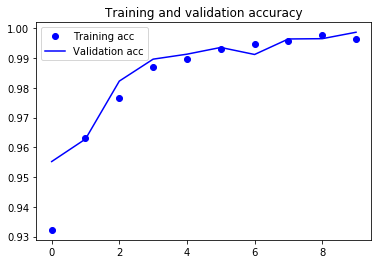

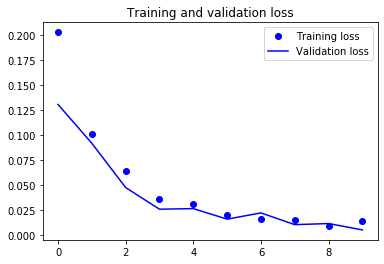

In [11]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [12]:
model_json = model.to_json()
with open("model.json", "w") as json_file : 
    json_file.write(model_json)

In [14]:
model.save_weights("model_w2.h5")
print("Saved model to disk")

Saved model to disk


In [1]:
print("A")

A
